In [51]:
import cv2
import numpy as np
import matplotlib.cbook as cbook
import matplotlib.image as image
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter

In [52]:
from google.colab import files
from io import BytesIO
from PIL import Image

#uploaded = files.upload()
#trial_1 = Image.open(BytesIO(uploaded['t1.jpg']))
trial_1 = image.imread('t1.jpg')

In [53]:
trial_1.size

3133440

In [54]:
dataframe1 = pd.read_csv("stud1.txt", delimiter = '\t')

dataframe1.to_csv('stud1.csv', 
                  index = None)

In [55]:
dataframe1

,Event Type,Trial,Number,Start,End,Duration,Location X,Location Y,Dispersion X,Dispersion Y,Plane,Avg. Pupil Size X,Avg Pupil Size Y
0,Fixation L,1,1,599405224,599638122,232898,80.82,585.64,10,4,-1,22.00,22.00
1,Fixation L,1,2,599654774,599821422,166648,248.28,467.01,27,30,-1,21.81,21.81
2,Fixation L,1,3,599854617,600071322,216705,270.84,262.27,17,74,-1,19.91,19.91
3,Fixation L,1,4,600087924,600171288,83364,286.33,206.67,6,73,-1,19.29,19.29
4,Fixation L,1,5,600187941,600571100,383159,304.80,108.89,67,30,-1,19.02,19.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Fixation R,1,31,611633415,611999992,366577,839.83,107.03,93,5,-1,19.65,19.65
66,Fixation R,1,32,612016658,612583089,566431,901.43,109.31,34,8,-1,20.42,20.42
67,Fixation R,1,33,612633077,612732949,99872,298.22,295.44,62,37,-1,21.04,21.04
68,Fixation R,1,34,612749668,616148411,3398743,280.32,316.17,20,57,-1,21.89,21.89


In [56]:
df = dataframe1[dataframe1["Event Type"] == "Fixation L"]

In [57]:
pts = np.array(df[["Location X", "Location Y"]])

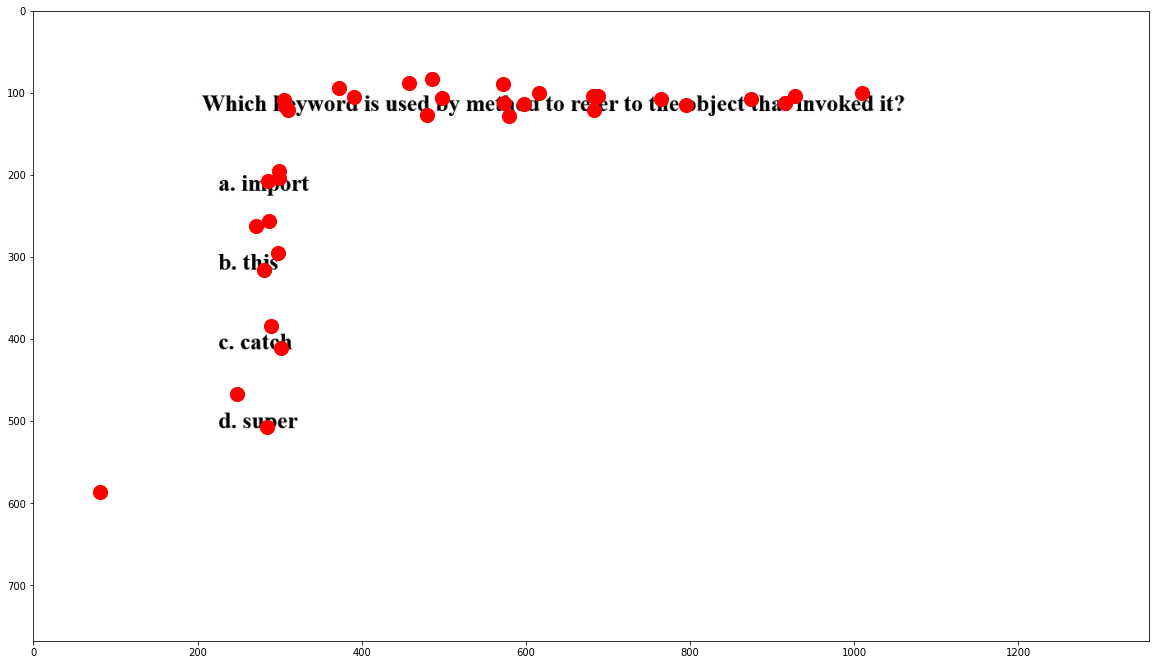

In [58]:
plt.rcParams["figure.figsize"] = (20,15)
plt.imshow(trial_1)
plt.scatter(pts[:, 0], pts[:, 1], marker="o", color="red", s=200)
plt.show()

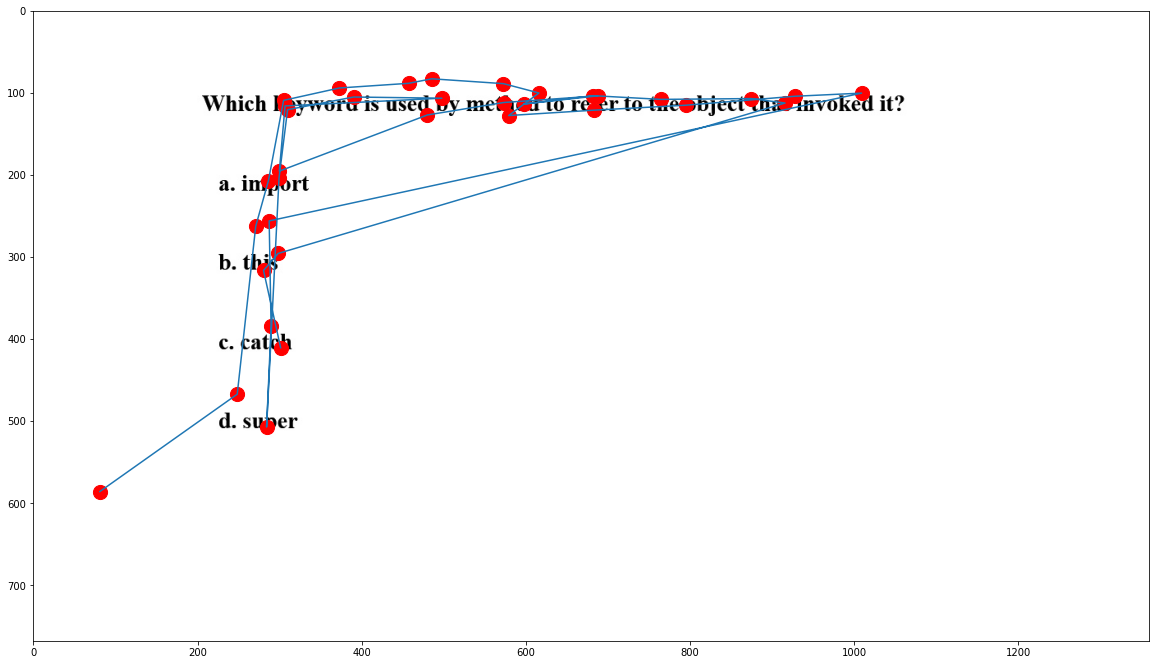

In [59]:
plt.imshow(trial_1)
plt.scatter(pts[:, 0], pts[:, 1], marker="o", color="red", s=200)
plt.plot(pts[:, 0], pts[:, 1])
plt.show()

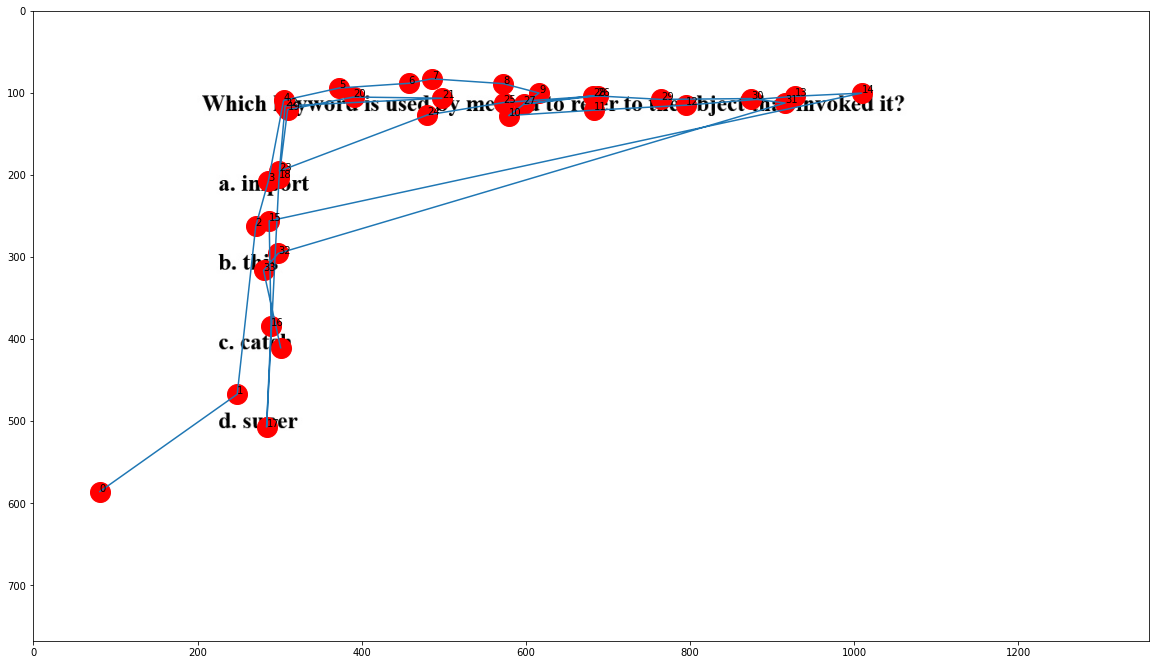

In [60]:
plt.imshow(trial_1)
plt.scatter(pts[:, 0], pts[:, 1], marker="o", color="red", s=400)
plt.plot(pts[:, 0], pts[:, 1])
#plt.show()

x = pts[:, 0]
y = pts[:, 1]

annotations = []

for i in range(34):
  annotations.append(i)

for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.show()

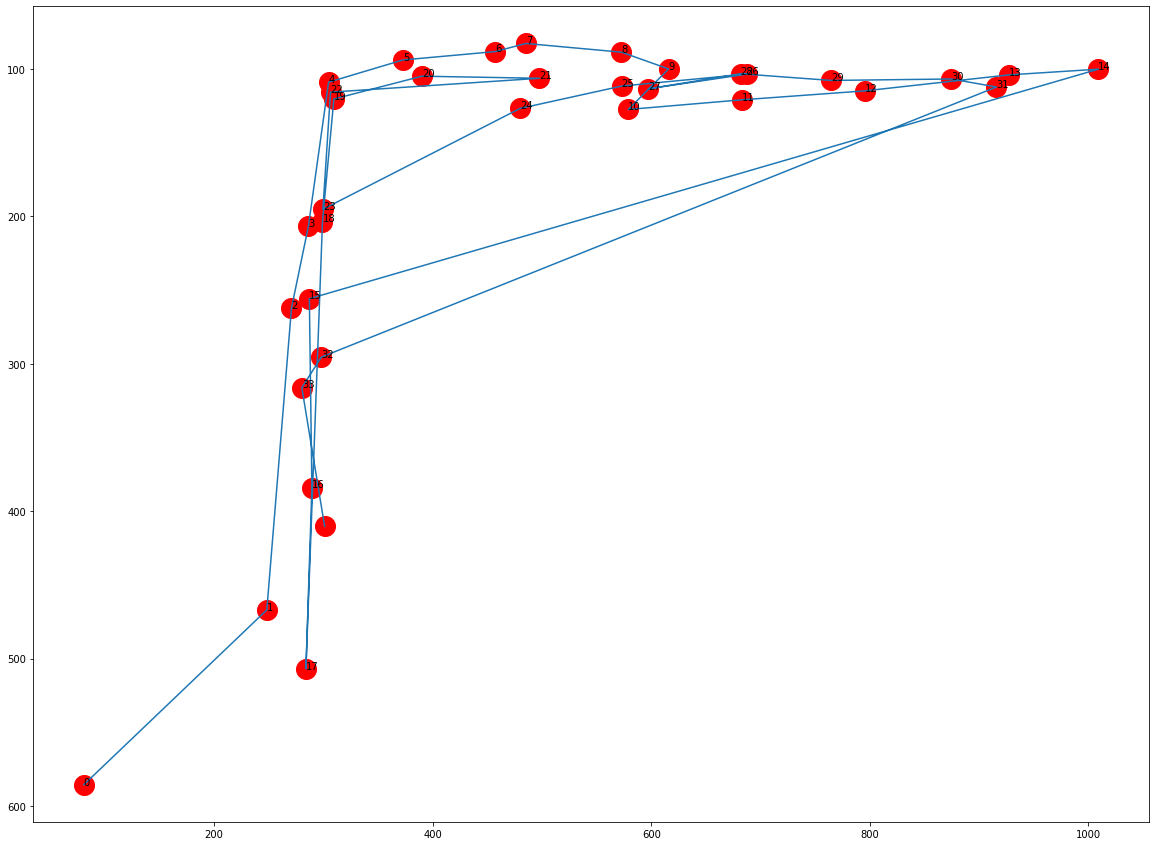

In [61]:
#plt.imshow(im)
plt.scatter(pts[:, 0], pts[:, 1], marker="o", color="red", s=400)
plt.plot(pts[:, 0], pts[:, 1])
#plt.show()

x = pts[:, 0]
y = pts[:, 1]

plt.gca().invert_yaxis()
annotations = []

for i in range(34):
  annotations.append(i)

for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.show()

In [62]:
def plot_points(df, im):
  plt.imshow(im)
  pts = np.array(df[["Location X", "Location Y"]])
  plt.scatter(pts[:, 0], pts[:, 1], marker="o", color="red", s=400)
  plt.plot(pts[:, 0], pts[:, 1])
  x = pts[:, 0]
  y = pts[:, 1]

  #plt.gca().invert_yaxis()
  annotations = []

  for i in range(df.shape[0]):
    annotations.append(i)

  for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
  plt.show()


In [63]:
df2 = pd.read_csv("stud1_1.csv")

#df2.to_csv('stud1_1.csv',  index = None)

In [64]:
df2

,Event Type,Trial,Number,Start,End,Duration,Location X,Location Y,Dispersion X,Dispersion Y,Plane,Avg. Pupil Size X,Avg Pupil Size Y
0,Fixation L,1,1,599405224,599638122,232898,80.82,585.64,10,4,-1,22.00,22.00
1,Fixation L,1,2,599654774,599821422,166648,248.28,467.01,27,30,-1,21.81,21.81
2,Fixation L,1,3,599854617,600071322,216705,270.84,262.27,17,74,-1,19.91,19.91
3,Fixation L,1,4,600087924,600171288,83364,286.33,206.67,6,73,-1,19.29,19.29
4,Fixation L,1,5,600187941,600571100,383159,304.80,108.89,67,30,-1,19.02,19.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,Fixation R,5,46,678890730,679073879,183149,233.19,472.67,36,38,-1,19.60,19.60
353,Fixation R,5,47,679090745,679440405,349660,232.03,543.79,8,45,-1,20.09,20.09
354,Fixation R,5,48,679473714,679657076,183362,347.84,346.10,40,18,-1,19.73,19.73
355,Fixation R,5,49,679673796,679773703,99907,279.06,249.39,18,79,-1,19.09,19.09


In [65]:
stud1_trial2 = df2[df2["Event Type"] == "Fixation L"]
stud1_trial2 = stud1_trial2[stud1_trial2["Trial"] == 2]

In [66]:
#uploaded = files.upload()
#trial_2 = Image.open(BytesIO(uploaded['t2.jpg']))
trial_2 = image.imread('t2.jpg')

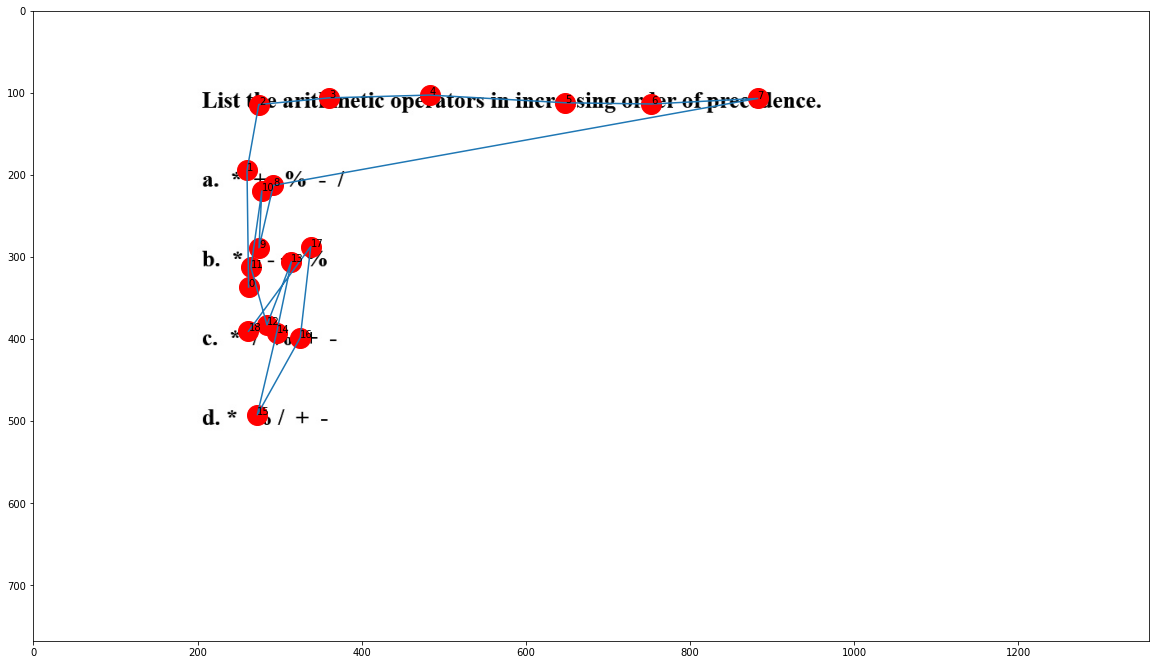

In [67]:
plot_points(stud1_trial2,trial_2)

In [68]:
stud1_trial3 = df2[df2["Event Type"] == "Fixation L"]
stud1_trial3 = stud1_trial3[stud1_trial3["Trial"] == 3]

In [69]:
#uploaded = files.upload()
#trial_3 = Image.open(BytesIO(uploaded['t3.jpg']))
trial_3 = image.imread('t3.jpg')

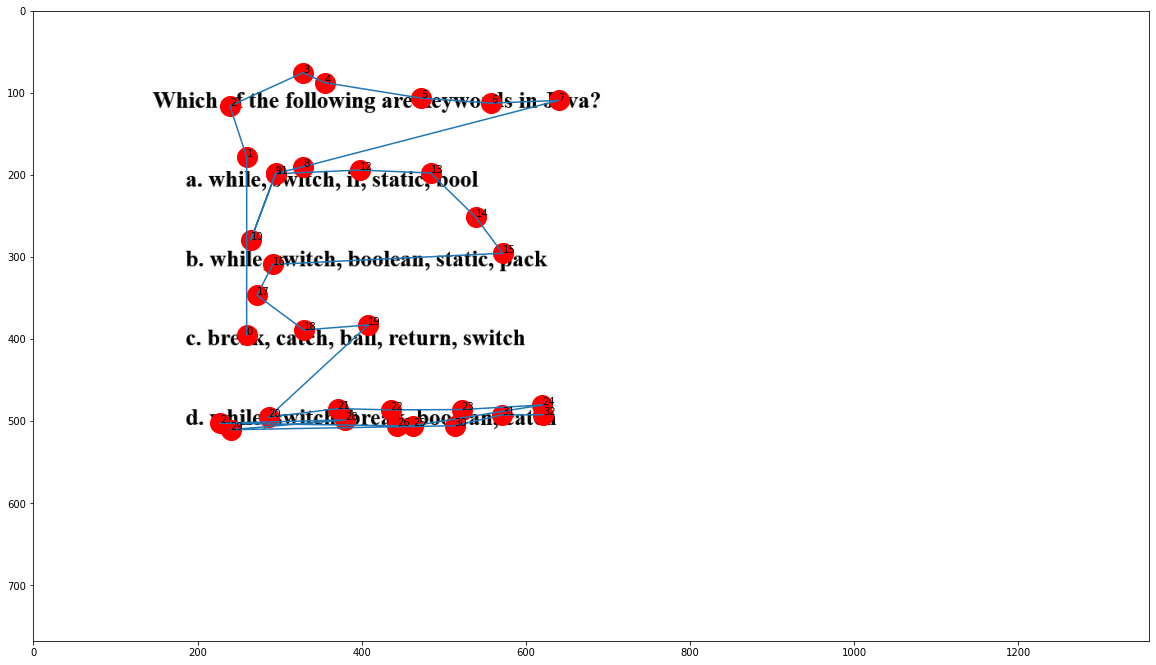

In [70]:
plot_points(stud1_trial3,trial_3)

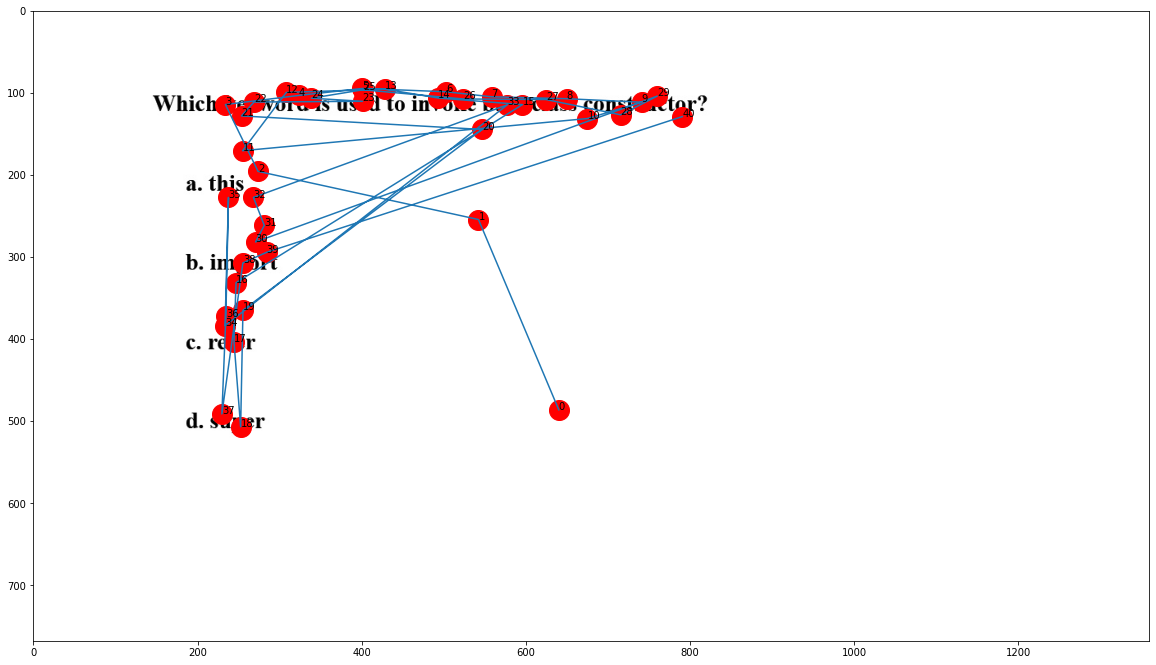

In [71]:
stud1_trial4 = df2[df2["Event Type"] == "Fixation L"]
stud1_trial4 = stud1_trial4[stud1_trial4["Trial"] == 4]

#uploaded = files.upload()
#trial_4 = Image.open(BytesIO(uploaded['t4.jpg']))

trial_4 = image.imread('t4.jpg')
plot_points(stud1_trial4,trial_4)

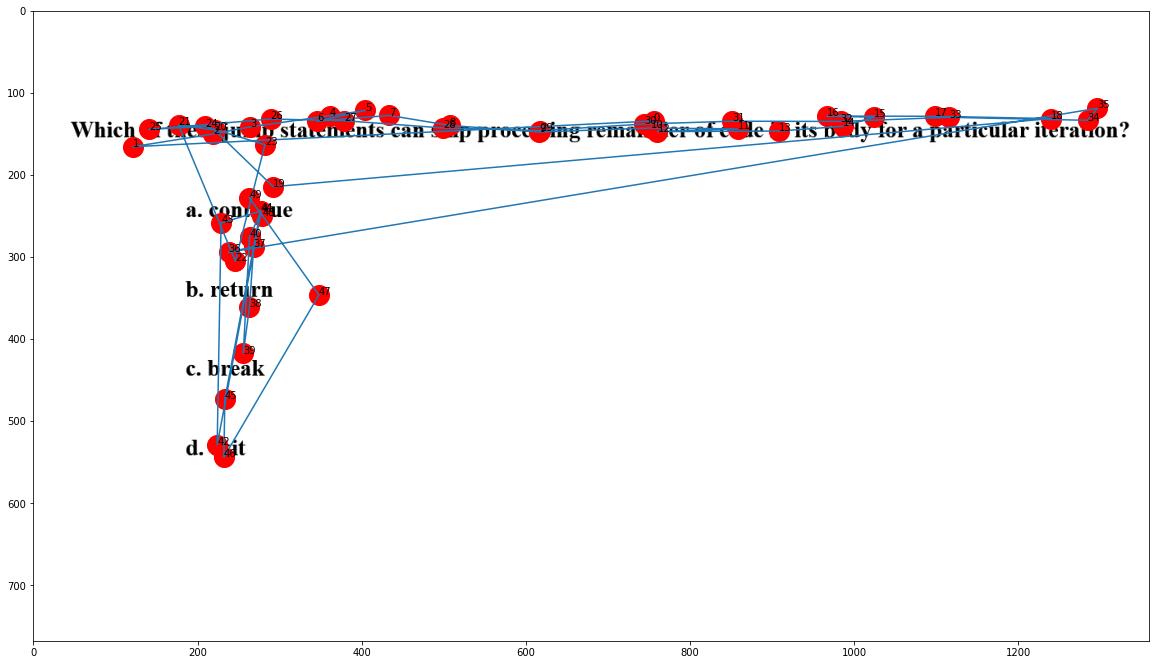

In [72]:
stud1_trial5 = df2[df2["Event Type"] == "Fixation L"]
stud1_trial5 = stud1_trial5[stud1_trial5["Trial"] == 5]

#uploaded = files.upload()
#trial_5 = Image.open(BytesIO(uploaded['t5.jpg']))
trial_5 = image.imread('t5.jpg')
plot_points(stud1_trial5,trial_5)

In [73]:
student_2 = pd.read_csv("stud2.txt", delimiter = '\t')
student_2.to_csv('stud2.csv', index = None)

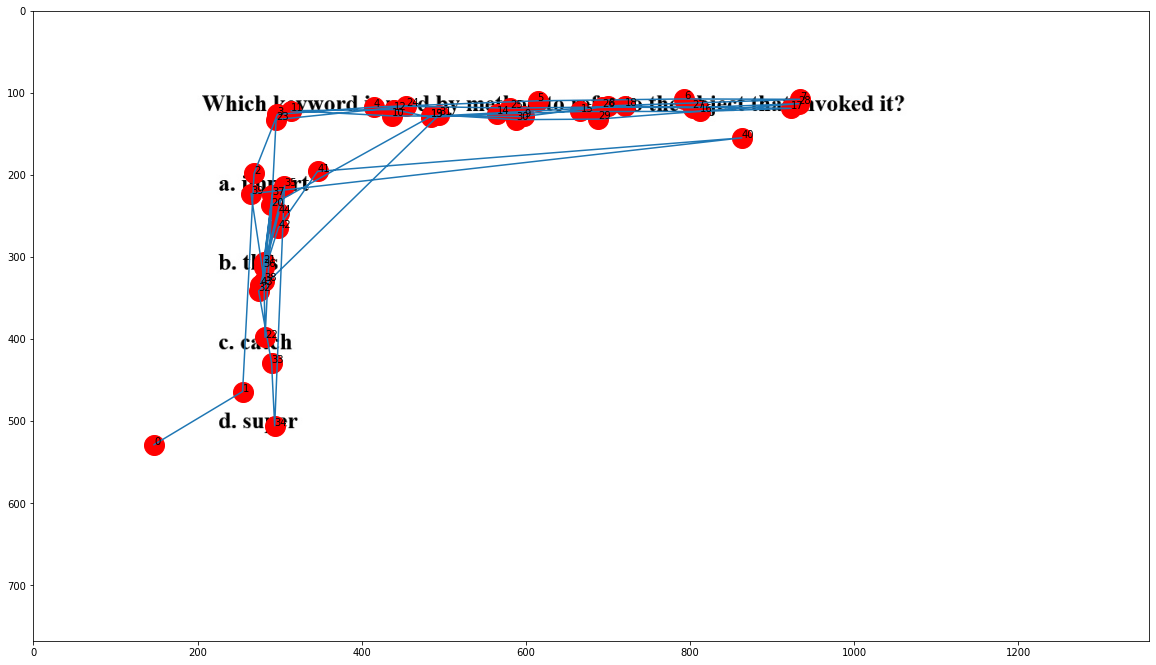

In [74]:
stud2_trial1 = student_2[student_2["Event Type"] == "Fixation L"]
stud2_trial1 = stud2_trial1[stud2_trial1["Trial"] == 1]

plot_points(stud2_trial1,trial_1)

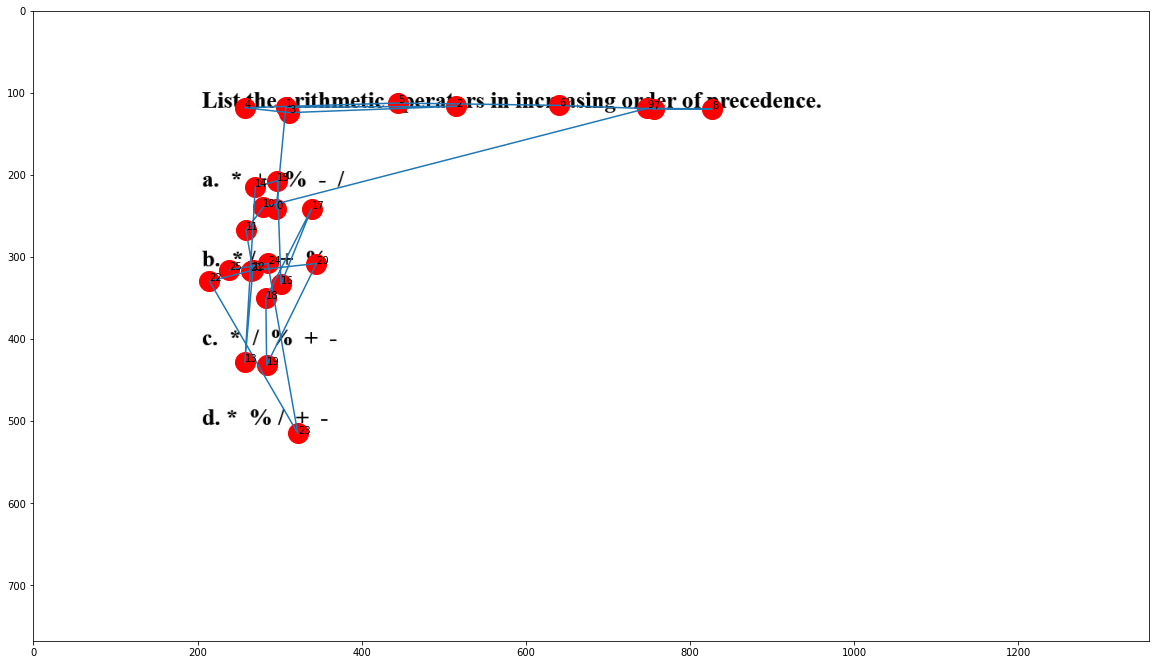

In [75]:
stud2_trial2 = student_2[student_2["Event Type"] == "Fixation L"]
stud2_trial2 = stud2_trial2[stud2_trial2["Trial"] == 2]
plot_points(stud2_trial2,trial_2)

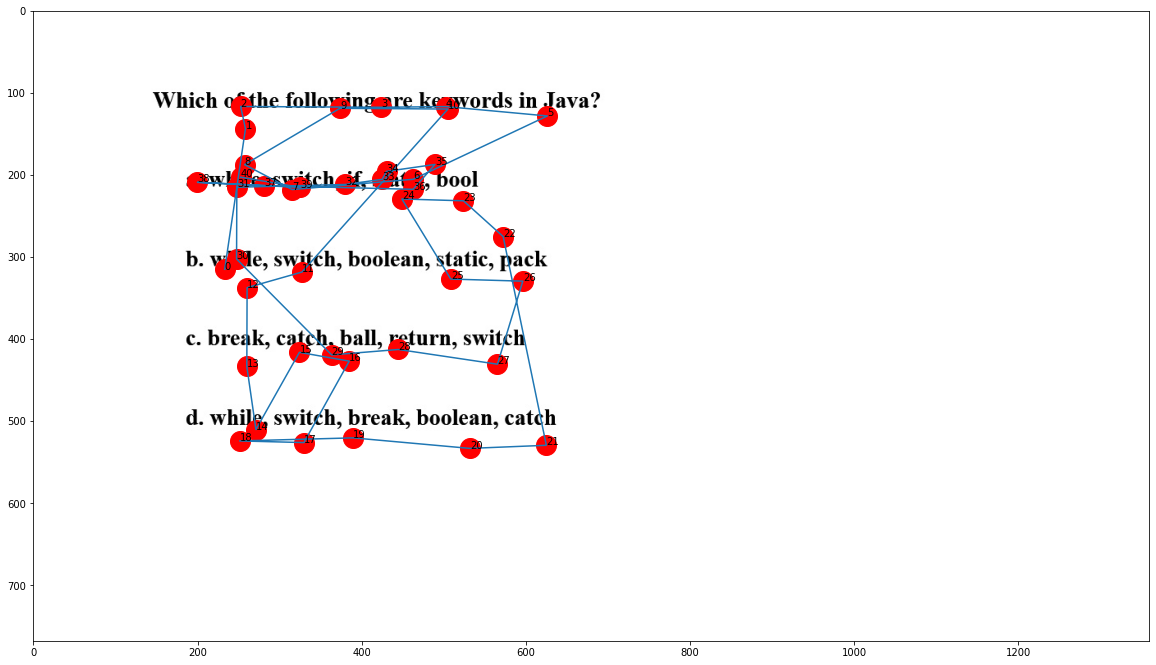

In [76]:
stud2_trial3 = student_2[student_2["Event Type"] == "Fixation L"]
stud2_trial3 = stud2_trial3[stud2_trial3["Trial"] == 3]
plot_points(stud2_trial3,trial_3)

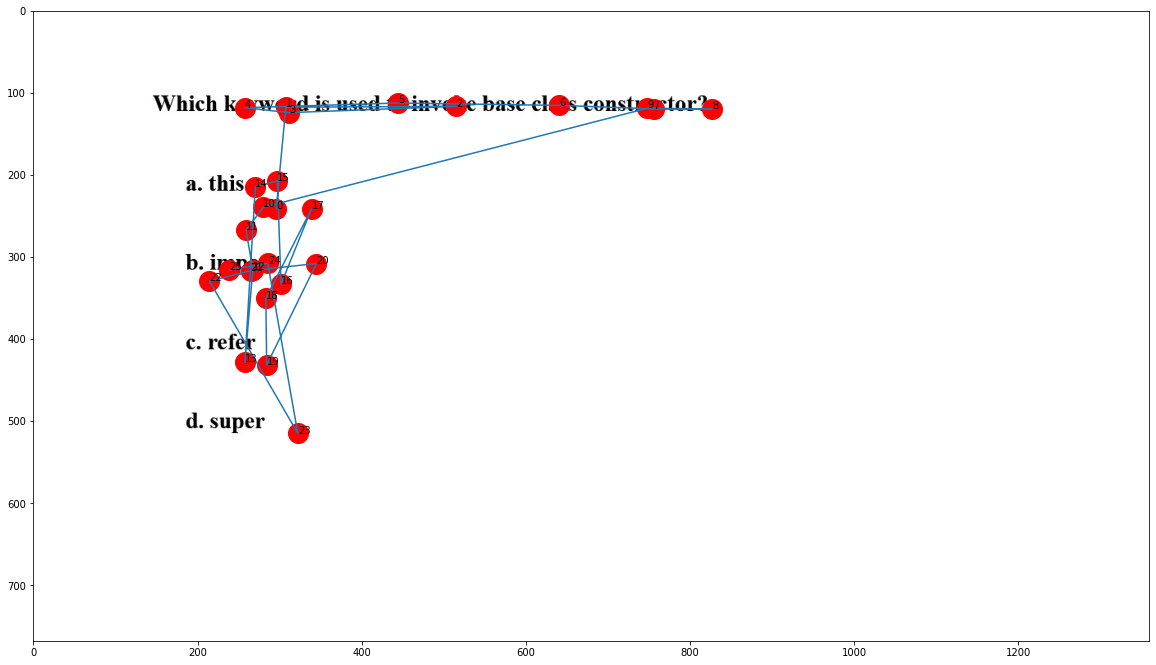

In [77]:
stud2_trial4 = student_2[student_2["Event Type"] == "Fixation L"]
stud2_trial4 = stud2_trial4[stud2_trial4["Trial"] == 4]
plot_points(stud2_trial2,trial_4)

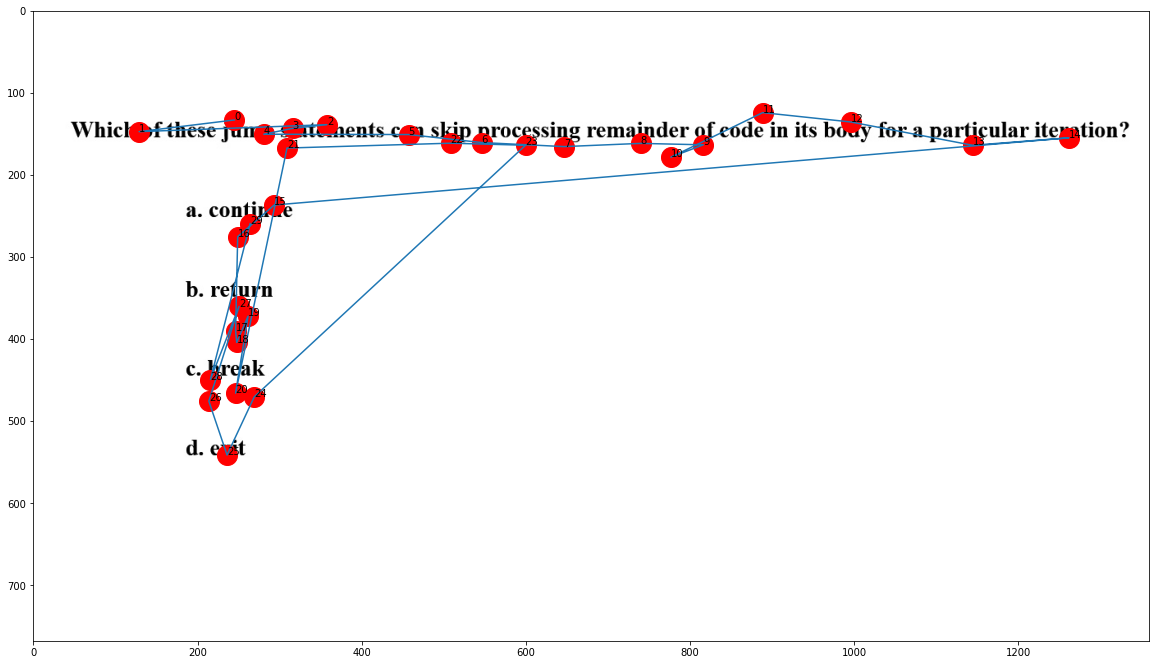

In [78]:
stud2_trial5 = student_2[student_2["Event Type"] == "Fixation L"]
stud2_trial5 = stud2_trial5[stud2_trial5["Trial"] == 5]
plot_points(stud2_trial5,trial_5)

In [79]:
def point(df):
  return np.array(df[["Location X", "Location Y"]])

In [80]:
s2_1=point(stud2_trial1)
s2_2=point(stud2_trial2)
s2_3=point(stud2_trial3)
s2_4=point(stud2_trial4)
s2_5=point(stud2_trial5)

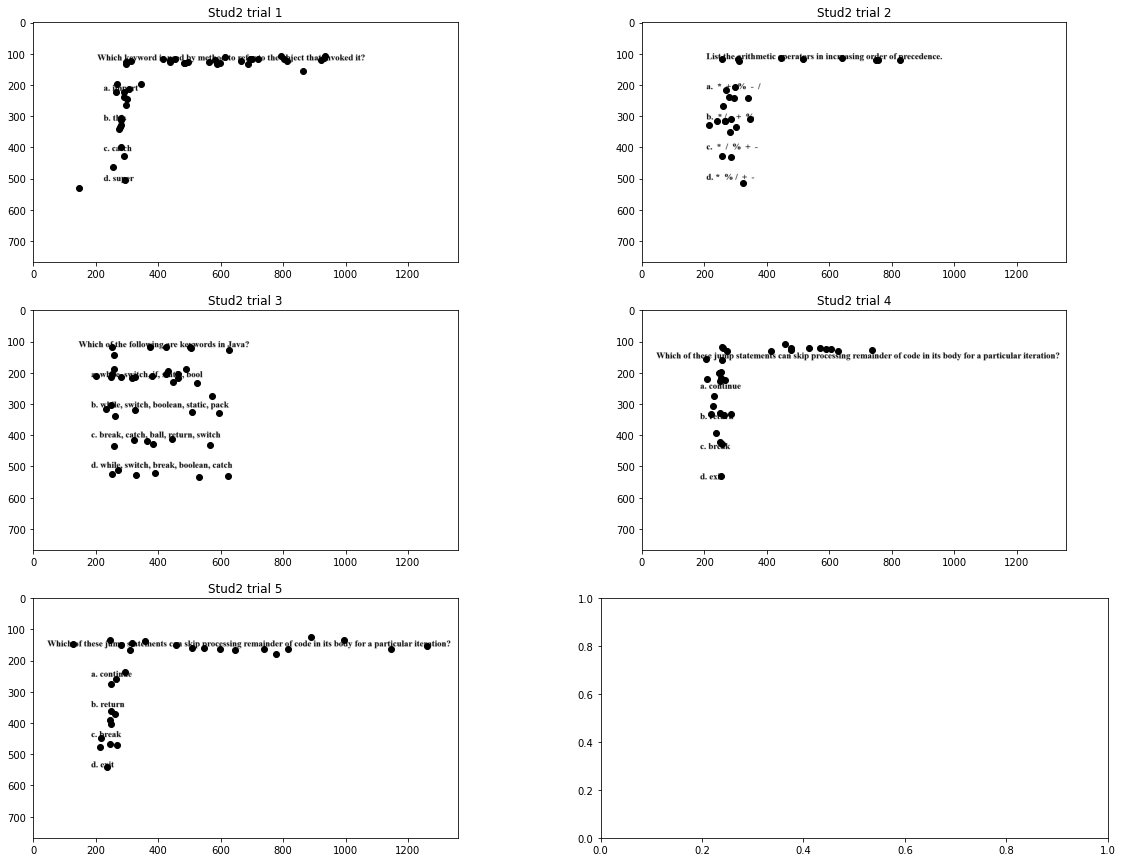

In [81]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(20, 15))
axes[0][0].set_title('Stud2 trial 1')
axes[0][0].imshow(trial_1)
axes[0][0].plot(s2_1[:, 0], s2_1[:, 1], 'ko')

axes[0][1].set_title('Stud2 trial 2')
axes[0][1].imshow(trial_2)
axes[0][1].plot(s2_2[:, 0], s2_2[:, 1], 'ko')

axes[1][0].set_title('Stud2 trial 3')
axes[1][0].imshow(trial_3)
axes[1][0].plot(s2_3[:, 0], s2_3[:, 1], 'ko')

axes[1][1].set_title('Stud2 trial 4')
axes[1][1].imshow(trial_5)
axes[1][1].plot(s2_4[:, 0], s2_4[:, 1], 'ko')

axes[2][0].set_title('Stud2 trial 5')
axes[2][0].imshow(trial_5)
axes[2][0].plot(s2_5[:, 0], s2_5[:, 1], 'ko')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


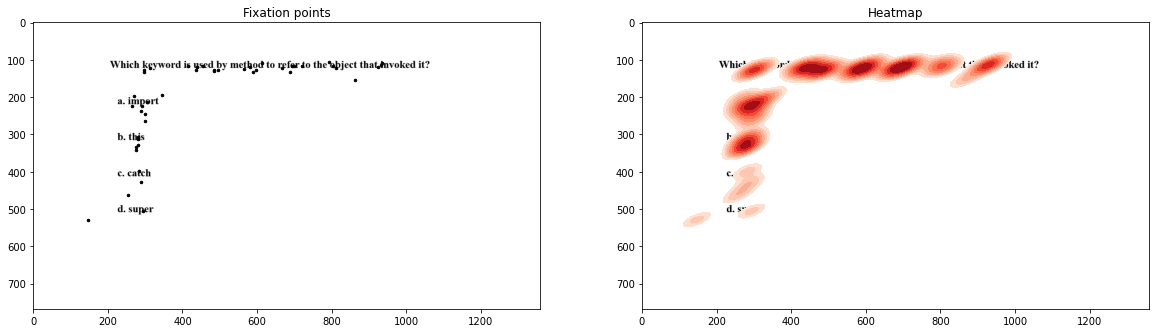

In [82]:
fig, axs = plt.subplots(1, 2)

sigmas = [0, 16, 32, 64]

for ax, s in zip(axs.flatten(), sigmas):
    if s == 0:
        ax.imshow(trial_1)
        ax.plot(s2_1[:, 0], s2_1[:, 1], 'k.', markersize=5)
        ax.set_title("Fixation points")
    else:
        hmax = sns.kdeplot(s2_1[:, 0], s2_1[:, 1], cmap="Reds", shade=True, bw=.15)
        hmax.collections[0].set_alpha(0)
        plt.imshow(trial_1, zorder=0, origin='upper')
        ax.set_title("Heatmap")


plt.show()



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


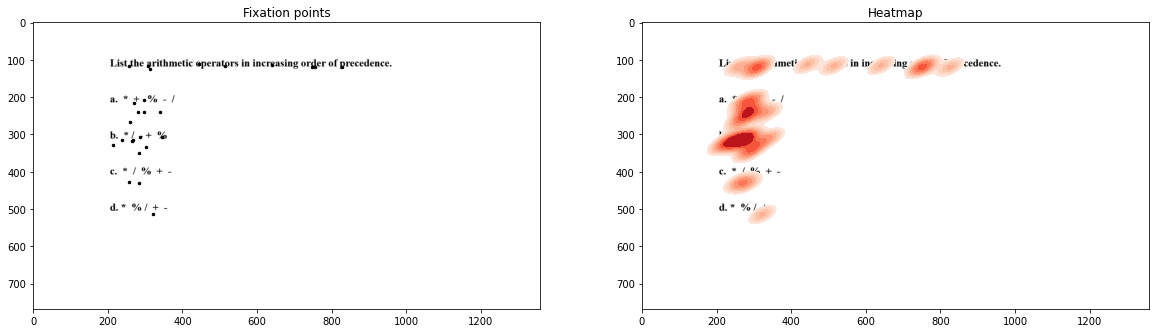

In [83]:
fig, axs = plt.subplots(1, 2)

sigmas = [0, 16, 32, 64]

for ax, s in zip(axs.flatten(), sigmas):
    if s == 0:
        ax.imshow(trial_2)
        ax.plot(s2_2[:, 0], s2_2[:, 1], 'k.', markersize=5)
        ax.set_title("Fixation points")
    else:
        hmax = sns.kdeplot(s2_2[:, 0], s2_2[:, 1], cmap="Reds", shade=True, bw=.15)
        hmax.collections[0].set_alpha(0)
        plt.imshow(trial_2, zorder=0, origin='upper')
        ax.set_title("Heatmap")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


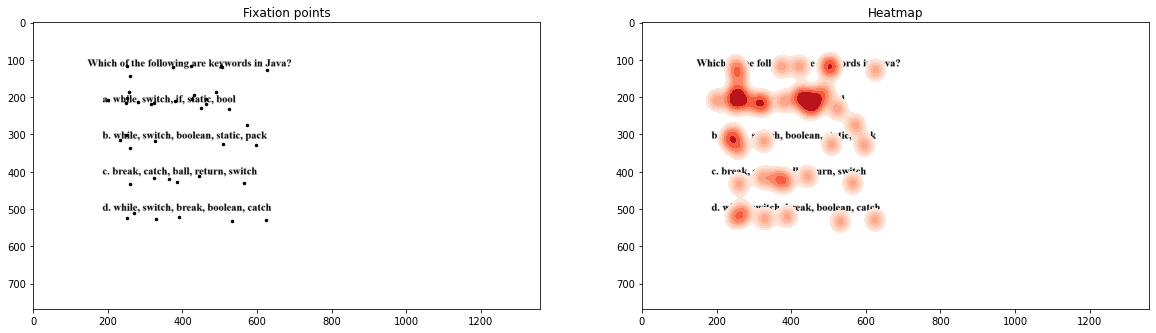

In [84]:
fig, axs = plt.subplots(1, 2)

sigmas = [0, 16, 32, 64]

for ax, s in zip(axs.flatten(), sigmas):
    if s == 0:
        ax.imshow(trial_3)
        ax.plot(s2_3[:, 0], s2_3[:, 1], 'k.', markersize=5)
        ax.set_title("Fixation points")
    else:
        hmax = sns.kdeplot(s2_3[:, 0], s2_3[:, 1], cmap="Reds", shade=True, bw=.15)
        hmax.collections[0].set_alpha(0)
        plt.imshow(trial_3, zorder=0, origin='upper')
        ax.set_title("Heatmap")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


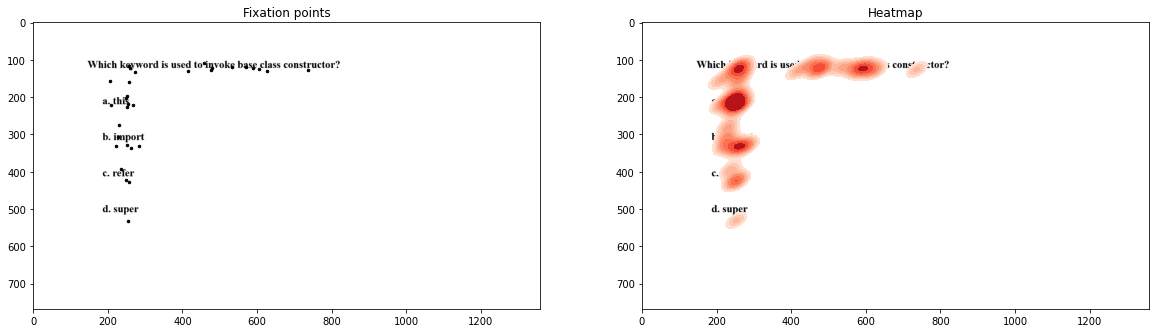

In [85]:
fig, axs = plt.subplots(1, 2)

sigmas = [0, 16, 32, 64]

for ax, s in zip(axs.flatten(), sigmas):
    if s == 0:
        ax.imshow(trial_4)
        ax.plot(s2_4[:, 0], s2_4[:, 1], 'k.', markersize=5)
        ax.set_title("Fixation points")
    else:
        hmax = sns.kdeplot(s2_4[:, 0], s2_4[:, 1], cmap="Reds", shade=True, bw=.15)
        hmax.collections[0].set_alpha(0)
        plt.imshow(trial_4, zorder=0, origin='upper')
        ax.set_title("Heatmap")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


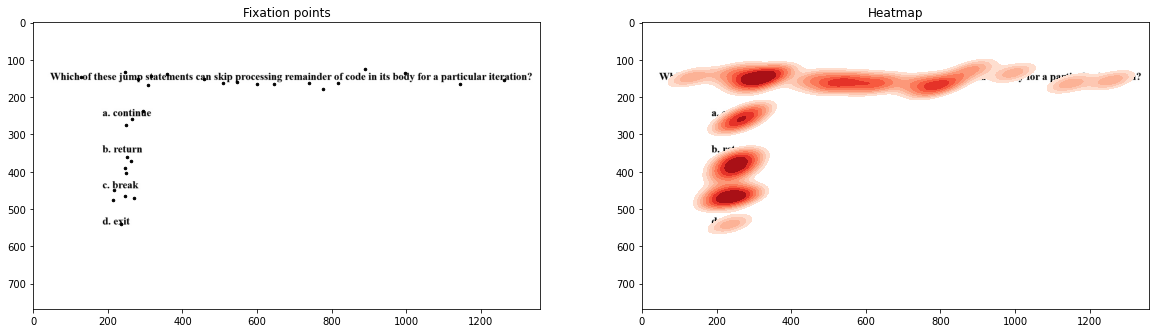

In [86]:
fig, axs = plt.subplots(1, 2)

sigmas = [0, 16, 32, 64]

for ax, s in zip(axs.flatten(), sigmas):
    if s == 0:
        ax.imshow(trial_5)
        ax.plot(s2_5[:, 0], s2_5[:, 1], 'k.', markersize=5)
        ax.set_title("Fixation points")
    else:
        hmax = sns.kdeplot(s2_5[:, 0], s2_5[:, 1], cmap="Reds", shade=True, bw=.15)
        hmax.collections[0].set_alpha(0)
        plt.imshow(trial_5, zorder=0, origin='upper')
        ax.set_title("Heatmap")

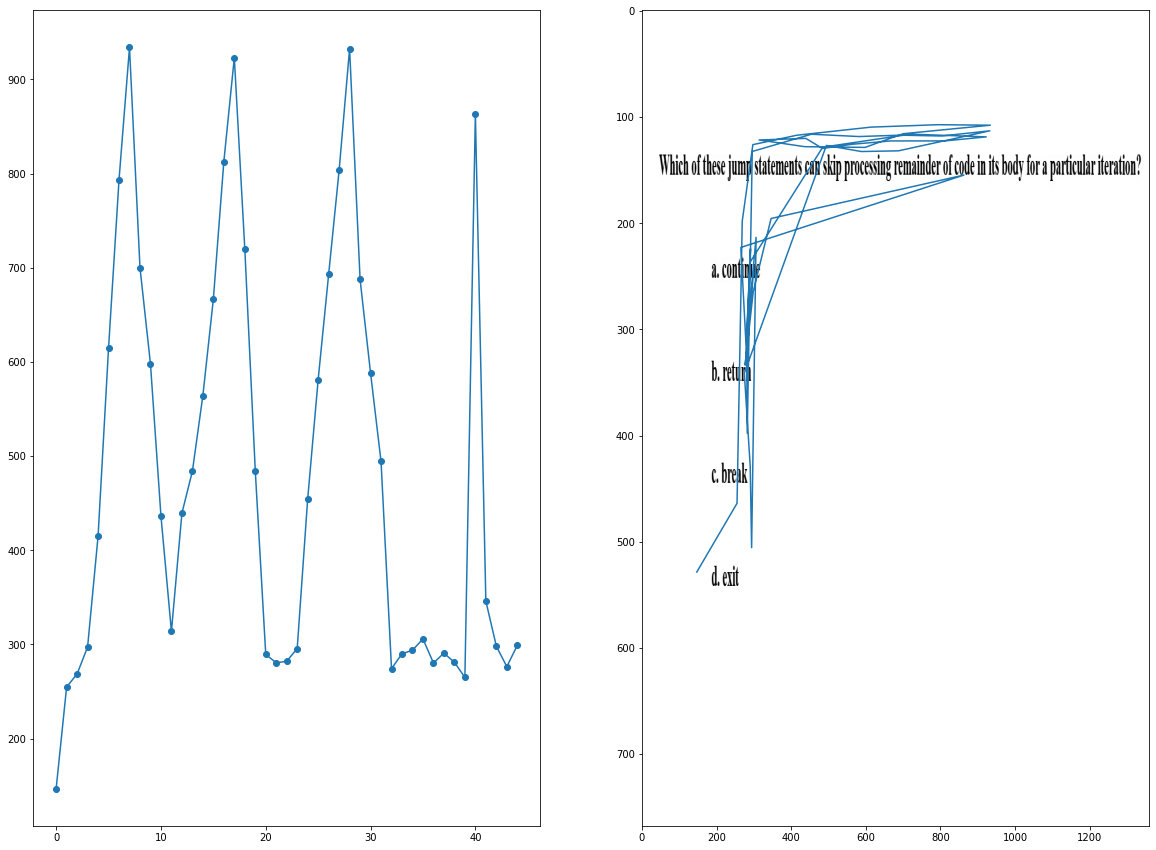

In [87]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20, 15))

axes[0].plot(s2_1[:, 0], marker='o')

stud2_trial1 = student_2[student_2["Event Type"] == "Fixation L"]
stud2_trial1 = stud2_trial1[stud2_trial1["Trial"] == 1]
axes[1].imshow(trial_5, aspect="auto")
axes[1].plot(s2_1[:, 0],s2_1[:, 1])

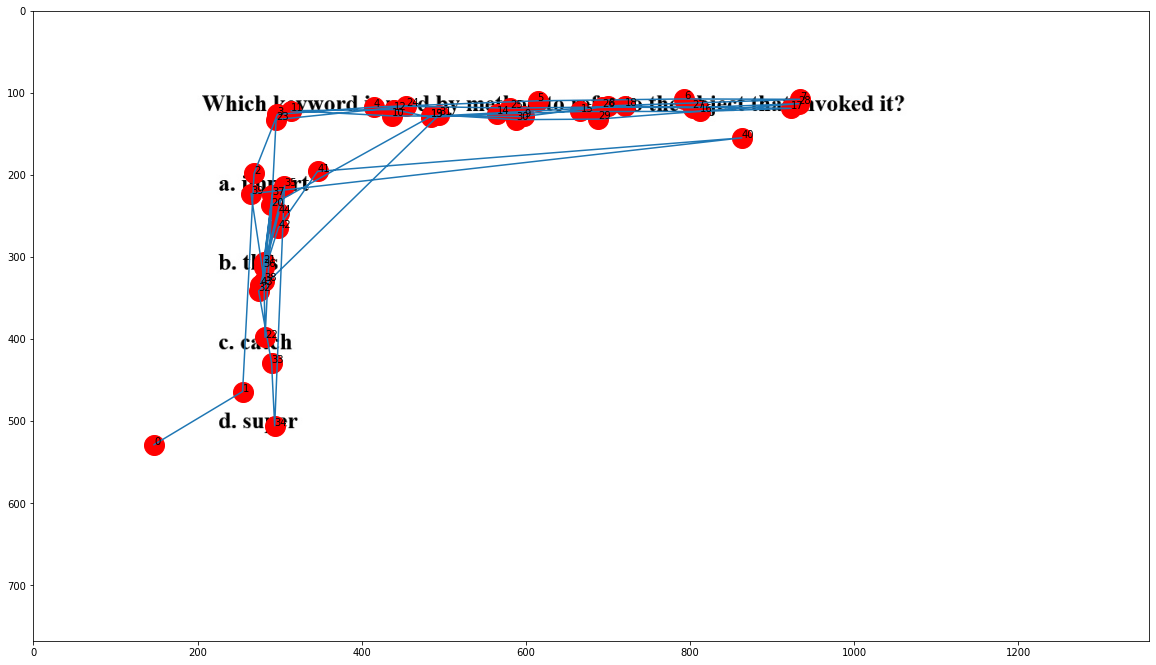

In [88]:
stud2_trial1 = student_2[student_2["Event Type"] == "Fixation L"]
stud2_trial1 = stud2_trial1[stud2_trial1["Trial"] == 1]

plot_points(stud2_trial1,trial_1)

In [89]:
def function(x,y):
  if(x>=200 and y <=130):
    return "Q"
  elif (x>=200 and x<=310 and y <=220):
    return "A"
  elif (x>=200 and x<=300 and y <=320 and y>220):
    return "B"
  elif (x>=200 and x<=350 and y <=420 and y >320):
    return "C"
  elif (x>=200 and x<=350 and y <=520):
    return "D"
  else:
    return "NA"

print(function(274.36,341.25))

C


In [90]:
#student_2["AOI"] = student_2.apply(lambda x:1+1, axis=1)

In [91]:
#AB QQQQQQ KQ KQ KQ KA BC AB ABD


In [92]:
data = [[1,'A'],[2,'B'],[3,'Q'],[4,'Q'],[5,'Q'],[6,'Q'],[7,'Q'],[8,'Q'],[9,'K'],[10,'Q'],[11,'K'],[12,'Q'],[13,'K'],[14,'Q'],[15,'K'],[16,'A'],[17,'B'],[18,'C'],[19,'A'],[20,'B'],[21,'A'],[22,'B'],[23,'D']]
 
df = pd.DataFrame(data, columns = ['TIME', 'FIXATION'])
df

,TIME,FIXATION
0,1,A
1,2,B
2,3,Q
3,4,Q
4,5,Q
5,6,Q
6,7,Q
7,8,Q
8,9,K
9,10,Q


Text(0.5, 1.0, 'Stud2 trial 1')

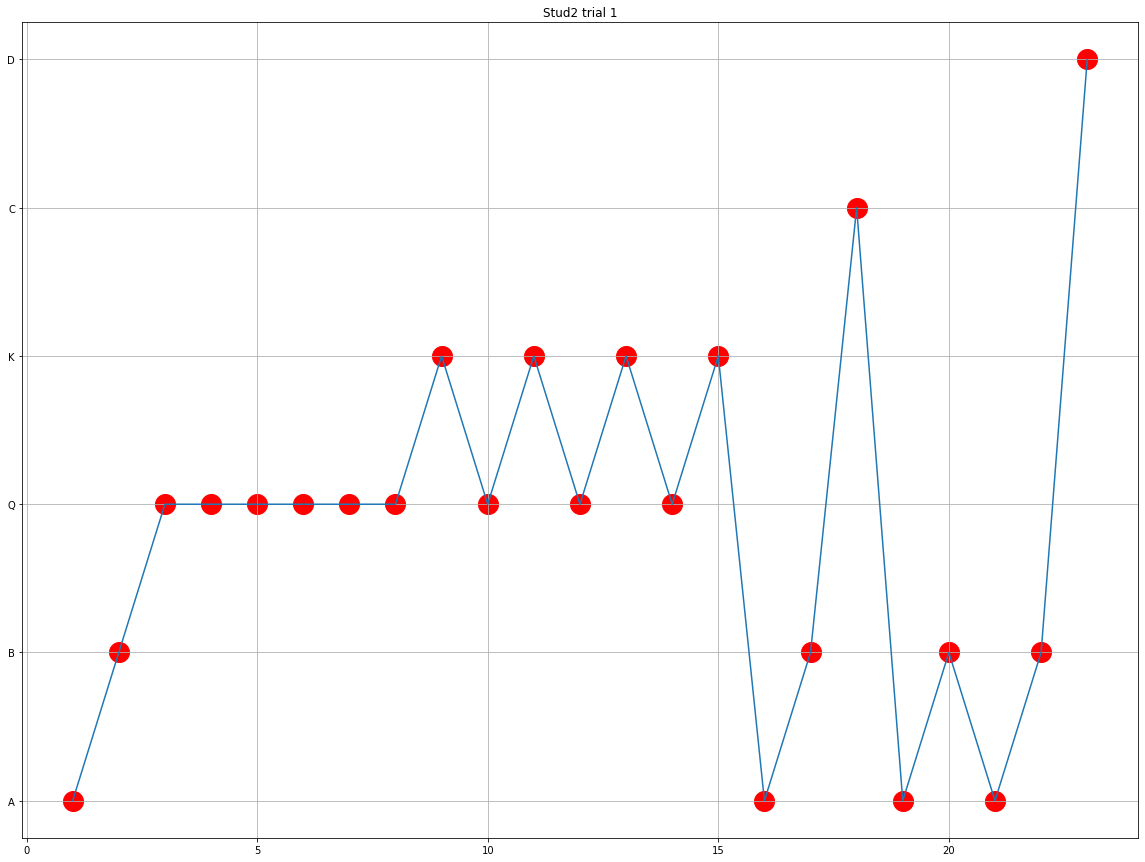

In [99]:
plt.scatter(df["TIME"], df['FIXATION'], marker="o", color="red", s=400)
plt.plot(df["TIME"], df['FIXATION'])
plt.grid(True)
plt.title("Stud2 trial 1")

In [95]:
data = "B Q Q Q K Q A A A Q Q K B B C D C C D D D D D B A A B B C C C B A A A A A A A A A A"
df2 = pd.DataFrame({'time': [i+1 for i in range(42)],'fixation': [i for i in data.split(' ')]})

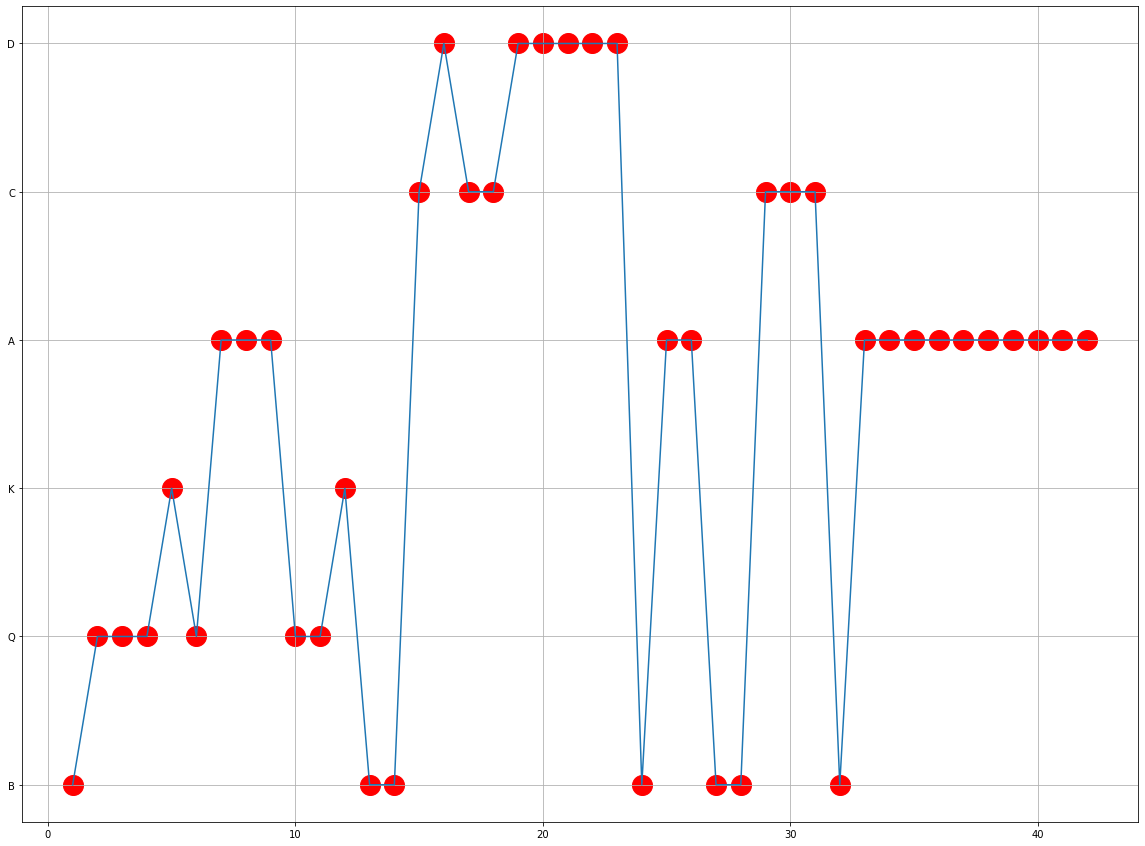

In [97]:
plt.scatter(df2["time"], df2['fixation'], marker="o", color="red", s=400)
plt.plot(df2["time"], df2['fixation'])
plt.grid(True)
plt.title("stud2  trial 2") 

In [94]:
s3= "B Q Q Q K Q A A A Q Q K B B C D C C D D D D D B A A B B C C C B A A A A A A A A A A"
df3 = pd.DataFrame({'time': [i+1 for i in range(42)],'fixation': [i for i in data.split(' ')]})